# King County Homes

In [120]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
pwd

'/Users/em/Desktop/Project/bsc-phase-two-project/notebooks/exploratory/Emma'

In [6]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
df = df.drop(15856) #dropped the house with 33 bedrooms as it was an outlier 

In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.004180,0.011581,-0.023721,0.008169,-0.010831,0.021589,-0.012019,-0.008195,-0.001766,0.020643,-0.002734,-0.138570
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.276297,0.395739,0.036031,0.667964,0.605392,0.053965,0.129603,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002303,0.080922,0.023440,0.366174,0.492543,0.160736,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.067281,0.186446,-0.126443,0.665834,0.686664,0.507166,0.051044,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.110228,0.282528,-0.059397,0.762776,0.876448,0.318140,0.055654,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.023142,0.075295,-0.008806,0.114726,0.184134,0.052939,0.004511,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.021879,0.028424,-0.264013,0.458783,0.523970,0.489175,0.003525,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,-0.004180,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.406654,0.017656,0.087381,0.075460,-0.026083,0.087243,0.031059,-0.012768,-0.039869,0.088858,0.032000
view,0.011581,0.395739,0.080922,0.186446,0.282528,0.075295,0.028424,0.406654,1.000000,0.045776,0.249721,0.166290,-0.054577,0.100960,0.085284,0.006154,-0.077907,0.279554,0.073328
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.017656,0.045776,1.000000,-0.146854,-0.158826,-0.361555,-0.061840,0.002835,-0.015209,-0.105800,-0.092979,-0.003093


In [9]:
#df.value_counts('sqft_living')

In [10]:
#sns.scatterplot(data=df, x="sqft_living", y="price")

### Breakdown the IQR for the housing data 

In [24]:
df1 = df.loc[df['price'] < 645000]
df2 = df1.loc[df1['price'] > 322000]
middle_data = df2
middle_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [86]:
middle_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.077900e+04,10779.000000,10779.000000,10779.000000,10779.000000,1.077900e+04,10779.000000,9602.000000,10751.000000,10779.000000,10779.000000,10779.000000,10779.000000,8853.000000,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000
mean,4.637103e+09,461600.416736,3.314964,2.063062,1929.345858,1.430227e+04,1.494619,0.002083,0.136731,3.382874,7.493367,1653.561277,1971.967251,63.505252,98081.402078,47.590178,-122.213683,1886.944707,12488.642824
std,2.855981e+09,89616.509804,0.869351,0.649990,646.876429,3.610390e+04,0.556860,0.045594,0.559984,0.623865,0.805914,628.383393,29.594751,350.140469,50.304900,0.130451,0.146412,508.640719,26855.110432
min,1.200021e+06,322200.000000,1.000000,0.750000,410.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,410.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,748.000000
25%,2.224390e+09,385000.000000,3.000000,1.750000,1450.000000,4.652500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1952.000000,0.000000,98034.000000,47.511600,-122.338000,1500.000000,4800.000000
50%,3.937900e+09,450000.000000,3.000000,2.250000,1860.000000,7.203000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1500.000000,1976.000000,0.000000,98074.000000,47.606000,-122.237000,1810.000000,7264.000000
75%,7.304301e+09,535000.000000,4.000000,2.500000,2330.000000,1.009800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,1999.000000,0.000000,98118.000000,47.696800,-122.121000,2230.000000,9719.000000
max,9.895000e+09,644500.000000,11.000000,7.500000,5461.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,11.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,4362.000000,438213.000000


In [87]:
#X = middle_data['bedrooms']
#y = middle_data['bathrooms']

#plt.plot(X, y, 'o')
#m, b = np.polyfit(X, y, 1)

#plt.plot(X, m*X + b);

In [96]:
df = df.assign(bath_bed_ratio = df['bathrooms']/df['bedrooms'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bath_bed_ratio
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.333333
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.750000
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.500000
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.750000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.833333
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.625000
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.375000
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.833333


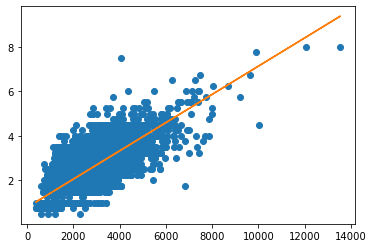

In [104]:
X = df['sqft_living']
y = df['bathrooms']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

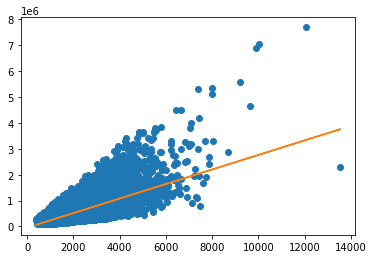

In [107]:
X = df['sqft_living']
y = df['price']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

In [113]:
model = sm.OLS(df['sqft_living'], df['bathrooms'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            sqft_living   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          2.844e+05
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:01:26   Log-Likelihood:                     -1.6894e+05
No. Observations:               21596   AIC:                                  3.379e+05
Df Residuals:                   21595   BIC:                                  3.379e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [111]:
model = sm.OLS(df['price'], df['sqft_living'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        15:56:35   Log-Likelihood:                     -3.0010e+05
No. Observations:               21596   AIC:                                  6.002e+05
Df Residuals:                   21595   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [114]:
model = sm.OLS(df['bath_bed_ratio'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         bath_bed_ratio   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                          4.967e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:12:32   Log-Likelihood:                         -9263.9
No. Observations:               21596   AIC:                                  1.853e+04
Df Residuals:                   21595   BIC:                                  1.854e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

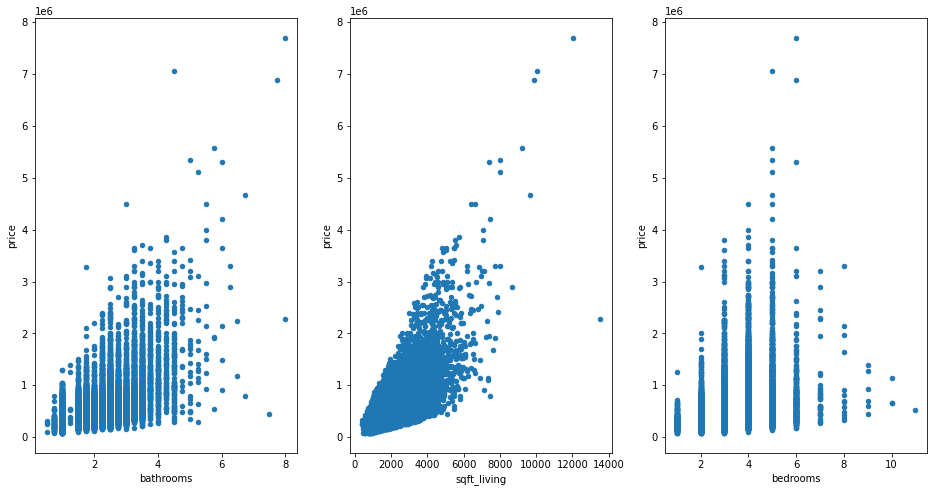

In [118]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='bathrooms', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[1])
df.plot(kind='scatter', x='bedrooms', y='price', ax=axs[2])

In [124]:
f = 'price ~ bathrooms + sqft_living + bedrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7443.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:25:45   Log-Likelihood:            -2.9971e+05
No. Observations:               21596   AIC:                         5.994e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.667e+04   7064.514     12.269      0.000    7.28e+04    1.01e+05
bathrooms    8842.0716   3521.299      2.511      0.012    1940.066    1.57e+04
sqft_living   312.5815      3.111    100.461      0.000     306.483     318.680
bedrooms    -6.387e+04   2436.216    -26.218      0.000   -6.86e+04   -5.91e+04
==============================================================================
Omnibus:                    14301.865   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           480421.944
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      25.464   Cond. No.                     9.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
#sklearn

features = ['bedrooms', 'bathrooms', 'sqft_living']
X = df[features]
y = df['price']

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[-63872.48638878   8842.07160254    312.5814528 ]
0.5084028217502579
0.5083345190670998


In [127]:
list(zip(features, mlr.coef_))

[('bedrooms', -63872.4863887806),
 ('bathrooms', 8842.071602538887),
 ('sqft_living', 312.581452804889)]

In [141]:
df.loc['price','bedrooms']

KeyError: 'price'

In [139]:
import seaborn as sns
sns.heatmap(df_refined.corr(), annot=True);

AttributeError: 'list' object has no attribute 'corr'